In [1]:
import os
import sys
import time
import scipy.io as sio
import numpy as np
import scipy
from scipy.stats import t
from sklearn import svm
import PIL.Image
from spectral import *
import matplotlib.pyplot as plt
import math
%matplotlib inline 

In [2]:
import sklearn
fig_size = plt.rcParams['figure.figsize']
print(plt.rcParams['figure.figsize'])
fig_size[0] = 12.0
fig_size[1] = 9.0
plt.rcParams['figure.figsize'] = fig_size
print(plt.rcParams['figure.figsize'])
print(sklearn.__version__)

[6.0, 4.0]
[12.0, 9.0]
0.19.1


In [3]:
hsi_file_U = '/home/saumo/PaviaU.mat'
gnd_file_U = u'/home/saumo/PaviaU_gt.mat'
data_U = sio.loadmat(hsi_file_U)
img_U = data_U['paviaU'].astype(np.int32)
data1_U = sio.loadmat(gnd_file_U)
gnd_img_U = data1_U['paviaU_gt'].astype(np.int32)
hsi_file = '/home/saumo/Downloads/Pavia.mat'
gnd_file = u'/home/saumo/Downloads/Pavia_gt.mat'
data = sio.loadmat(hsi_file)
img = data['pavia'].astype(np.int32)
data1 = sio.loadmat(gnd_file)
gnd_img = data1['pavia_gt'].astype(np.int32)

In [4]:
np.unique(data1['pavia_gt'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
np.unique(data1_U['paviaU_gt'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Ground Truth Dimensions for University
(610, 340)


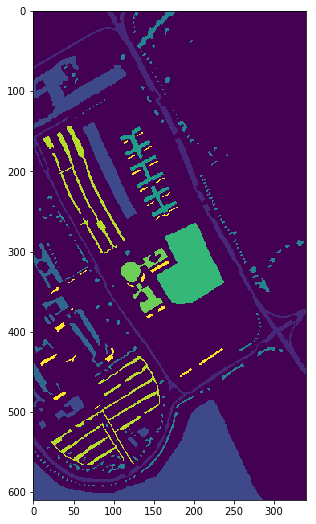

In [6]:
plt.imshow(gnd_img_U)
print("Ground Truth Dimensions for University")
print(gnd_img_U.shape)

Ground Truth Dimensions
(1096, 715)


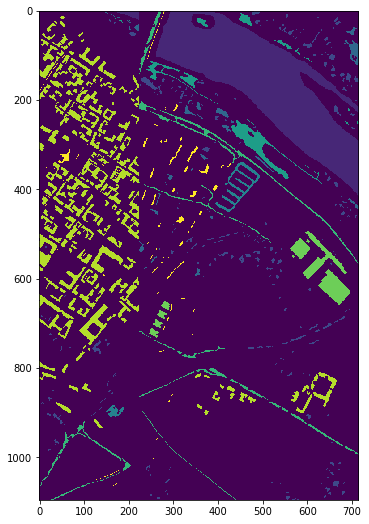

In [7]:
plt.imshow(gnd_img)
print("Ground Truth Dimensions")
print(gnd_img.shape)

In [8]:
print("Dataset Dimensions of University")
print(img_U.shape)
print("Dataset Dimensions")
print(img.shape)

Dataset Dimensions of University
(610, 340, 103)
Dataset Dimensions
(1096, 715, 102)


There are 103 spectras in University scene of which we choose the 101th spectra, giving an image dimension of 610*340
(610, 340)


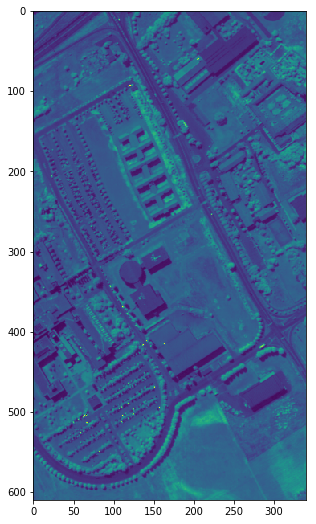

In [9]:
new_arr_U = img_U[0:610, 0:340,100]
print("There are 103 spectras in University scene of which we choose the 101th spectra, giving an image dimension of 610*340")
print(new_arr_U.shape)
plt.imshow(new_arr_U)

There are 102 spectras in scene of which we choose the 101th spectra, giving an image dimension of 1096*715
(1096, 715)


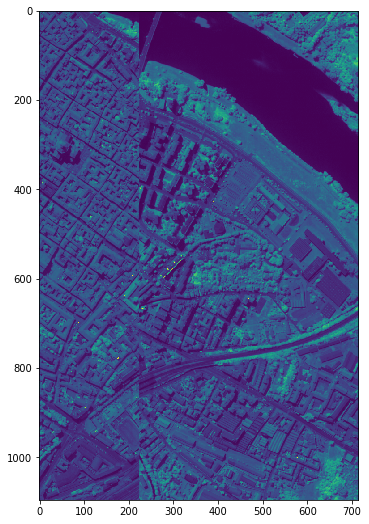

In [10]:
new_arr = img[0:1096, 0:715, 100]
print("There are 102 spectras in scene of which we choose the 101th spectra, giving an image dimension of 1096*715")
print(new_arr.shape)
plt.imshow(new_arr)

# Calculation of CSMSAD Matrix

In [11]:
#deleting first spectrum of Pavia University
img_U = np.delete(img_U, 0, axis=2)

In [12]:
#Pavia Centre
trees = np.asarray(np.where(gnd_img==2)).T.tolist()
asphalt = np.asarray(np.where(gnd_img==3)).T.tolist()
meadows = np.asarray(np.where(gnd_img==8)).T.tolist()
bs = np.asarray(np.where(gnd_img==9)).T.tolist()
bitumen = np.asarray(np.where(gnd_img==5)).T.tolist()
bricks = np.asarray(np.where(gnd_img==4)).T.tolist()
shadow = np.asarray(np.where(gnd_img==7)).T.tolist()

#Pavia University
trees_U = np.asarray(np.where(gnd_img_U==4)).T.tolist()
asphalt_U = np.asarray(np.where(gnd_img_U==1)).T.tolist()
meadows_U = np.asarray(np.where(gnd_img_U==2)).T.tolist()
bs_U = np.asarray(np.where(gnd_img_U==6)).T.tolist()
bitumen_U = np.asarray(np.where(gnd_img_U==7)).T.tolist()
bricks_U = np.asarray(np.where(gnd_img_U==8)).T.tolist()
shadow_U = np.asarray(np.where(gnd_img_U==9)).T.tolist()

In [13]:
sad = 0
for x,y in trees:
    for x_U,y_U in trees_U:
        sad = sad + np.arccos(np.inner(img[x,y,], img_U[x_U,y_U,])/(np.linalg.norm(img[x,y,])*np.linalg.norm(img_U[x_U,y_U,])))
print(sad)

2669802.5684279483


In [14]:
print(sad/(len(trees)*len(trees_U)))

0.11468090099754626


# Dictionary learning

In [15]:
import random
Xs = np.asarray(img[trees[0][0], trees[0][1],])
trees_180 = random.sample(trees,180)
asphalt_180 = random.sample(asphalt,180)
meadows_180 = random.sample(meadows,180)
bs_180 = random.sample(bs,180) 
bitumen_180 = random.sample(bitumen,180) 
bricks_180 = random.sample(bricks,180)
features = [trees_180, asphalt_180, meadows_180, bs_180, bitumen_180, bricks_180]
for l in features:
    for x,y in l:
        Xs = np.vstack((Xs, np.asarray(img[x,y,])))
Xs = np.delete(Xs, 0, axis=0)
Xs.shape

(1080, 102)

In [16]:
Xt = np.asarray(img_U[trees_U[0][0], trees_U[0][1],])
trees_U_20 = random.sample(trees_U,20)
asphalt_U_20 = random.sample(asphalt_U,20)
meadows_U_20 = random.sample(meadows_U,20)
bs_U_20 = random.sample(bs_U,20) 
bitumen_U_20 = random.sample(bitumen_U,20) 
bricks_U_20 = random.sample(bricks_U,20)
features_U = [trees_U_20, asphalt_U_20, meadows_U_20, bs_U_20, bitumen_U_20, bricks_U_20]
for l in features_U:
    for x,y in l:
        Xt = np.vstack((Xt, np.asarray(img_U[x,y,])))
Xt = np.delete(Xt, 0, axis=0)
Xt.shape

(120, 102)

In [17]:
Xs = Xs.astype('float')
Xt = Xt.astype('float')

In [18]:
Xs = np.transpose(Xs)
Xs.shape

(102, 1080)

In [19]:
Xt = np.transpose(Xt)
Xt.shape

(102, 120)

In [20]:
Us, ss, Vs = np.linalg.svd(Xs, full_matrices=0)
#finding p for target
sum1s = np.sum(ss)
sum2s = 0
ps=0
while(1):
    if((sum2s/sum1s)<0.9):
        sum2s = sum2s + ss[ps]
        ps = ps+1
    else :
        print(ps)
        break

5


In [21]:
Ut, st, Vt = np.linalg.svd(Xt, full_matrices=0)
#finding p for target
sum1t = np.sum(st)
sum2t = 0
pt=0
while(1):
    if((sum2t/sum1t)<0.9):
        sum2t = sum2t + st[pt]
        pt = pt+1
    else :
        print(pt)
        break

5


In [22]:
from sklearn.decomposition import NMF
model = NMF(n_components=5, init='nndsvd', solver='cd', max_iter = 100000, random_state=0)
Ws = model.fit_transform(Xs)
Hs = model.components_
print("Xs")
print(Xs)
print("Ws")
print(Ws)
print("Hs")
print(Hs)
Fs = np.linalg.norm(Xs - np.matmul(Ws,Hs))**2
print(Fs)

Xs
[[ 630.  727.  146. ... 1361. 1459. 1229.]
 [ 356.  248.   29. ... 1015. 1550. 1728.]
 [ 238.    0.  117. ... 1002. 1547. 1646.]
 ...
 [4483. 3200. 3241. ... 2266. 1827. 1945.]
 [4414. 3208. 3277. ... 2255. 1846. 1972.]
 [4455. 3272. 3330. ... 2290. 1845. 1983.]]
Ws
[[3.53726657e+00 1.85431090e+01 6.77436093e+00 0.00000000e+00
  1.94175212e+02]
 [1.80856777e+00 3.07795856e+01 4.01742199e+00 2.26345439e-01
  1.57620418e+02]
 [4.93556641e-01 4.19248984e+01 6.66840311e+00 7.50665783e-01
  1.12357920e+02]
 [3.17042332e-01 5.12869664e+01 1.02915716e+01 7.91606830e-01
  8.19921345e+01]
 [6.64120234e-01 5.93835479e+01 1.11246619e+01 7.88274269e-01
  6.06294148e+01]
 [8.10662678e-01 6.37660020e+01 1.07700184e+01 1.20585646e+00
  5.07510490e+01]
 [8.63974835e-01 6.68071128e+01 1.04102189e+01 1.63689210e+00
  4.39653537e+01]
 [5.67354018e-01 6.90670058e+01 9.70204617e+00 1.80877495e+00
  3.93773706e+01]
 [2.08295310e-01 7.11102035e+01 9.21812908e+00 1.67294976e+00
  3.72255651e+01]
 [2.496646

In [23]:
from sklearn.decomposition import NMF
model = NMF(n_components=5, init='nndsvd', solver='cd', max_iter = 100000, random_state=0)
Wt = model.fit_transform(Xt)
Ht = model.components_
print("Xt")
print(Xt)
print("Wt")
print(Wt)
print("Ht")
print(Ht)
Ft = np.linalg.norm(Xt - np.matmul(Wt,Ht))**2
print(Ft)

Xt
[[ 662.  366.  375. ... 1077. 1458. 1386.]
 [ 463.  154.  140. ...  943. 1436. 1330.]
 [ 342.  187.  242. ...  957. 1565. 1367.]
 ...
 [3220. 3886. 4147. ... 2051. 1798. 2089.]
 [3247. 3855. 4118. ... 2052. 1767. 2120.]
 [3259. 3873. 4070. ... 2016. 1832. 2151.]]
Wt
[[4.20923440e+00 0.00000000e+00 3.39835184e-01 1.40670824e+02
  0.00000000e+00]
 [1.85615878e+00 1.07662213e+01 2.82742986e-01 1.08695661e+02
  5.53906408e+00]
 [1.10807853e+00 1.83787840e+01 2.71394659e-01 6.98356126e+01
  2.24544574e+01]
 [7.13729627e-01 2.42852499e+01 3.27207398e-01 4.77819528e+01
  2.98761196e+01]
 [3.28360811e-01 2.68664351e+01 3.39462745e-01 4.35563644e+01
  2.99376840e+01]
 [6.08297763e-01 2.50750029e+01 2.48065521e-01 4.13014081e+01
  3.64281388e+01]
 [5.56425937e-01 2.45855673e+01 1.78447217e-01 3.63429806e+01
  4.15302136e+01]
 [3.94758695e-01 2.57326432e+01 1.53950348e-01 3.51681003e+01
  4.15260953e+01]
 [3.65115511e-01 2.70255255e+01 1.22687572e-01 3.45499534e+01
  4.19341502e+01]
 [3.016249

In [24]:
print (np.linalg.norm(Xs - np.matmul(Wt,Hs))**2/(np.linalg.norm(Xs)**2))*100
print (np.linalg.norm(Xt - np.matmul(Wt,Ht))**2/(np.linalg.norm(Xt)**2))*100

36.85579955510172
0.05498292114347789


In [25]:
print (np.linalg.norm(Xs - np.matmul(Ws,Hs))**2/(np.linalg.norm(Xs)**2))*100
print (np.linalg.norm(Xt - np.matmul(Ws,Ht))**2/(np.linalg.norm(Xt)**2))*100

0.0621326167901306
4281.086869288179


In [26]:
Ws.shape

(102, 5)

In [27]:
Wt.shape

(102, 5)

In [28]:
Hs.shape

(5, 1080)

In [29]:
Ht.shape

(5, 120)

In [30]:
D = Ws
Vs = Hs
Vt = Ht

In [31]:
Xs_copy = Xs
Xt_copy = Xt

In [32]:
F = (np.linalg.norm(Xs - np.matmul(D,Vs)))**2 + (np.linalg.norm(Xt - np.matmul(D,Vt)))**2
print(F)

1362799878737.0938


In [33]:
f= []
for i in range(1000):
    #Xs, Xt is fixed, we modify D, Vs, Vt so that F decreases
    Vs_temp = Vs
    Vt_temp = Vt
    Vs = np.divide(np.multiply(Vs, np.matmul(np.transpose(D),Xs)),np.matmul(np.matmul(np.transpose(D),D),Vs))
    Vt = np.divide(np.multiply(Vt, np.matmul(np.transpose(D),Xt)),np.matmul(np.matmul(np.transpose(D),D),Vt))
    D = np.divide(np.multiply(D, (np.matmul(Xs,np.transpose(Vs_temp))+np.matmul(Xt,np.transpose(Vt_temp)))),(np.matmul(np.matmul(D,Vs_temp),np.transpose(Vs_temp))+np.matmul(np.matmul(D,Vt_temp),np.transpose(Vt_temp))))
    F = (np.linalg.norm(Xs - np.matmul(D,Vs)))**2 + (np.linalg.norm(Xt - np.matmul(D,Vt)))**2
    f.append(F)
    print("Iteration {}/{}".format(i, 1000))
    print(F)

Iteration 0/1000
52190113437.98483
Iteration 1/1000
49533286514.00765
Iteration 2/1000
22937491230.353535
Iteration 3/1000
39163290858.65649
Iteration 4/1000
21280235400.70945
Iteration 5/1000
35069606257.41141
Iteration 6/1000
20534274609.219135
Iteration 7/1000
33350325517.579567
Iteration 8/1000
20146282594.45447
Iteration 9/1000
32583931345.607067
Iteration 10/1000
19916147402.5612
Iteration 11/1000
32213194875.594788
Iteration 12/1000
19764493243.24086
Iteration 13/1000
32015462722.177254
Iteration 14/1000
19658306998.585545
Iteration 15/1000
31899344040.161552
Iteration 16/1000
19581782816.655025
Iteration 17/1000
31825362031.664024
Iteration 18/1000
19525760383.050682
Iteration 19/1000
31775148912.54665
Iteration 20/1000
19484203261.431847
Iteration 21/1000
31739406993.504814
Iteration 22/1000
19452942400.626602
Iteration 23/1000
31713032252.88015
Iteration 24/1000
19429070564.27942
Iteration 25/1000
31693015295.423252
Iteration 26/1000
19410555387.607166
Iteration 27/1000
31677

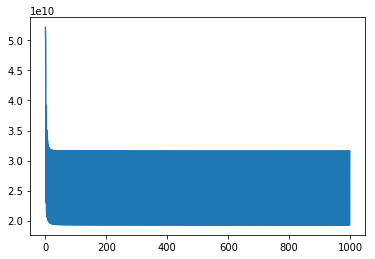

In [34]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
plt.rcParams['figure.figsize']=(40,5)
plt.plot(f)

In [35]:
print (np.linalg.norm(Xs - np.matmul(D,Vs))**2/(np.linalg.norm(Xs)**2))*100
print (np.linalg.norm(Xt - np.matmul(D,Vt))**2/(np.linalg.norm(Xt)**2))*100

8.05337876290189
8.104144906863239


In [36]:
(F/((np.linalg.norm(Xs))**2 + (np.linalg.norm(Xt))**2))*100

8.057502592105765

We have 6 classes, so one-vs-one training for covering all of them would need 6C2 = 15 classifiers. The 6 classes are trees, asphalt, meadows, bs, bitumen, bricks. We begin with trees and asphalt classifier.

In [37]:
#source
Vs_trees = Vs[:,:180]
Vs_asphalt = Vs[:,180:360]
Vs_meadows = Vs[:,360:540]
Vs_bs = Vs[:,540:720]
Vs_bitumen = Vs[:,720:900]
Vs_bricks = Vs[:,900:1080]
print Vs_trees.shape
print Vs_asphalt.shape
print Vs_meadows.shape
print Vs_bs.shape
print Vs_bitumen.shape
print Vs_bricks.shape

(5, 180)
(5, 180)
(5, 180)
(5, 180)
(5, 180)
(5, 180)


In [38]:
Vt_trees = Vt[:,:20]
Vt_asphalt = Vt[:,20:40]
Vt_meadows = Vt[:,40:60]
Vt_bs = Vt[:,60:80]
Vt_bitumen = Vt[:,80:100]
Vt_bricks = Vt[:,100:120]
print Vt_trees.shape
print Vt_asphalt.shape
print Vt_meadows.shape
print Vt_bs.shape
print Vt_bitumen.shape
print Vt_bricks.shape

(5, 20)
(5, 20)
(5, 20)
(5, 20)
(5, 20)
(5, 20)


In [39]:
ys = []
for i in range(180):
    ys.append(1)
for i in range(180):
    ys.append(-1)
yt = []
for i in range(20):
    yt.append(1)
for i in range(20):
    yt.append(-1)

In [40]:
reg_lambda = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001]
ws = np.zeros((5,1))
wt = np.zeros((5,1))
cs = 0
ct = 0

In [41]:
def loss_func(ws,wt,cs,ct,Vs_1,Vs_2,Vt_1,Vt_2):
    Vs_final = np.append(Vs_1, Vs_2, axis=1)
    Vt_final = np.append(Vt_1, Vt_2, axis=1)
    sum1 = 0
    for i in range(360):
        sum1 += np.log(1+np.exp(-ys[i]*(np.dot(np.transpose(ws),Vs_final[:,i])+cs)))
    for i in range(40):
        sum1 += np.log(1+np.exp(-yt[i]*(np.dot(np.transpose(wt),Vt_final[:,i])+ct)))
    return sum1

In [42]:
def dloss_func(ws,wt,cs,ct,Vs_1,Vs_2,Vt_1,Vt_2):
    Vs_final = np.append(Vs_1, Vs_2, axis=1)
    Vt_final = np.append(Vt_1, Vt_2, axis=1)
    dws= np.zeros((5,1))
    dwt= np.zeros((5,1))
    dcs= 0
    dct= 0
    for i in range(360):
        dcs += -ys[i]*np.exp(-ys[i]*(np.dot(np.transpose(ws),Vs_final[:,i])+cs))/(1+np.exp(-ys[i]*(np.dot(np.transpose(ws),Vs_final[:,i])+cs)))
    for i in range(20):
        dct += -yt[i]*np.exp(-yt[i]*(np.dot(np.transpose(wt),Vt_final[:,i])+ct))/(1+np.exp(-yt[i]*(np.dot(np.transpose(wt),Vt_final[:,i])+ct)))
    for i in range(360):
        dws += -ys[i]*np.exp(-ys[i]*(np.dot(np.transpose(ws),Vs_final[:,i])+cs))/(1+np.exp(-ys[i]*(np.dot(np.transpose(ws),Vs_final[:,i])+cs)))*np.resize(Vs_final[:,i],(5,1))
    for i in range(20):
        dwt += -yt[i]*np.exp(-yt[i]*(np.dot(np.transpose(wt),Vt_final[:,i])+ct))/(1+np.exp(-yt[i]*(np.dot(np.transpose(wt),Vt_final[:,i])+ct)))*np.resize(Vt_final[:,i],(5,1))
    #dws = np.resize(dws,(5,1))
    #dwt = np.resize(dwt,(5,1))
    return dws,dwt,dcs,dct

In [43]:
def grad_desc(ws,wt,cs,ct,Vs_1,Vs_2,Vt_1,Vt_2,max_int,reglamb):
    W = np.zeros((5,2))
    miter = 1
    step = .00001/miter
    #vals = []
    l21_lamb = reglamb
    objectfs = []
    #Vs_final = np.append(Vs_1, Vs_2, axis=1)
    #Vt_final = np.append(Vt_1, Vt_2, axis=1)
    # you can customize your own condition of convergence, here we limit the number of iterations
    while (miter <= max_int):
        objectfs.append(loss_func(ws,wt,cs,ct,Vs_1,Vs_2,Vt_1,Vt_2))
        dws,dwt,dcs,dct = dloss_func(ws,wt,cs,ct,Vs_1,Vs_2,Vt_1,Vt_2)
        ws_temp = ws - step*dws
        wt_temp = wt - step*dwt
        cs_temp = cs - step*dcs
        ct_temp = ct - step*dct
        p = ws.shape[0]
        U = np.append(ws_temp,wt_temp,axis=1)
        for i in range(p):
            if((ws_temp[i]*ws_temp[i] + wt_temp[i]*wt_temp[i])>(step*step*l21_lamb*l21_lamb)):
                W[i] = (1 - (step*l21_lamb)/math.sqrt(ws_temp[i]*ws_temp[i] + wt_temp[i]*wt_temp[i]))*U[i]
            else:
                W[i] = 0 * U[i]
        ws_temp = np.resize(U[:,0],(5,1))
        wt_temp = np.resize(U[:,1],(5,1))
        if np.abs(loss_func(ws_temp,wt_temp,cs_temp,ct_temp,Vs_1,Vs_2,Vt_1,Vt_2)-loss_func(ws,wt,cs,ct,Vs_1,Vs_2,Vt_1,Vt_2))>0.0001:
            ws = ws_temp
            wt = wt_temp
            cs = cs_temp
            ct = ct_temp
        else:
            break
        print(ws,wt,cs,ct, loss_func(ws,wt,cs,ct,Vs_1,Vs_2,Vt_1,Vt_2), miter)
        miter += 1
    return objectfs, miter

In [44]:
objectfs, miter = grad_desc(ws,wt,cs,ct,Vs_trees,Vs_asphalt,Vt_trees,Vt_asphalt,1000,0.1)

(array([[-0.01256973],
       [-0.00137854],
       [-0.0016313 ],
       [ 0.01434925],
       [ 0.00036785]]), array([[0.00287654],
       [0.00025687],
       [0.00036735],
       [0.00223135],
       [0.00037427]]), array([0.]), array([0.0001]), array([243.99348488]), 1)
(array([[-0.02574661],
       [-0.0028419 ],
       [-0.00321756],
       [ 0.02215284],
       [ 0.00043362]]), array([[0.00555547],
       [0.00049651],
       [0.0007109 ],
       [0.00430254],
       [0.00072327]]), array([-9.70664436e-05]), array([0.00019321]), array([221.76207948]), 2)
(array([[-0.03520849],
       [-0.00389368],
       [-0.00436644],
       [ 0.03056602],
       [ 0.00074416]]), array([[0.00805233],
       [0.00072028],
       [0.00103252],
       [0.00622626],
       [0.00104897]]), array([-0.00010191]), array([0.00028016]), array([206.2945302]), 3)
(array([[-0.04384168],
       [-0.00485625],
       [-0.00537059],
       [ 0.03689208],
       [ 0.00101878]]), array([[0.01038261],
       [0

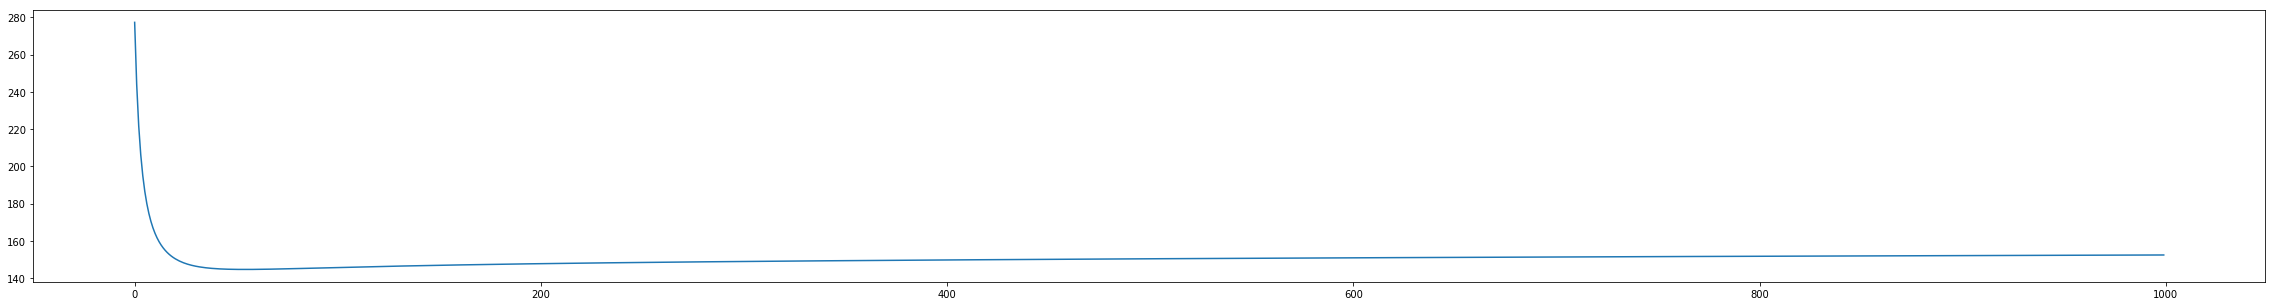

In [45]:
plt.plot(objectfs)

# Autoencoder

In [46]:
#Nh=Ns/(α∗(Ni+No))
#https://datascience.stackexchange.com/questions/27498/multi-task-learning-in-keras
#https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
import warnings

warnings.filterwarnings('ignore')

from __future__ import print_function
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
from keras.regularizers import l1
from keras import optimizers
from keras import layers

Using TensorFlow backend.


In [48]:
Ns = 0
all_features = features
trees_U_180 = random.sample(trees_U,180)
asphalt_U_180 = random.sample(asphalt_U,180)
meadows_U_180 = random.sample(meadows_U,180)
bs_U_180 = random.sample(bs_U,180) 
bitumen_U_180 = random.sample(bitumen_U,180) 
bricks_U_180 = random.sample(bricks_U,180)
all_features_U = [trees_U_180, asphalt_U_180, meadows_U_180, bs_U_180, bitumen_U_180, bricks_U_180]
for l in all_features:
    Ns += len(l)
Ns_U = 0
for l in all_features_U:
    Ns_U += len(l)
print (Ns)
print (Ns_U)
Ns_final = Ns + Ns_U
print (Ns_final)

1080
1080
2160


In [50]:
input_size = 102
code_size = 5
alpha_list_for_hidden_layer = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for i in alpha_list_for_hidden_layer:
    print (Ns_final/(i*(input_size + code_size)))
hidden_size = 50

10
6
5
4
3
2
2
2
2
1
1
1
1
1


In [51]:
Xs_autoencoder = np.asarray(img[trees[0][0], trees[0][1],])
for l in all_features:
    for x,y in l:
        Xs_autoencoder = np.vstack((Xs_autoencoder, np.asarray(img[x,y,])))
Xs_autoencoder = np.delete(Xs_autoencoder, 0, axis=0)
Xs_autoencoder.shape

(1080, 102)

In [52]:
Xt_autoencoder = np.asarray(img_U[trees_U[0][0], trees_U[0][1],])
for l in all_features_U:
    for x,y in l:
        Xt_autoencoder = np.vstack((Xt_autoencoder, np.asarray(img_U[x,y,])))
Xt_autoencoder = np.delete(Xt_autoencoder, 0, axis=0)
Xt_autoencoder.shape

(1080, 102)

In [ ]:
#Xs_autoencoder = random.sample(Xs_autoencoder,Xt_autoencoder.shape[0])
#Xs_autoencoder = np.asarray(Xs_autoencoder)
#Xs_autoencoder.shape

In [53]:
X_autoencoder = np.concatenate((Xs_autoencoder,Xt_autoencoder))
X_autoencoder.shape

(2160, 102)

In [55]:
Xs_autoencoder_2 = np.concatenate((Xs_autoencoder,Xs_autoencoder))
Xt_autoencoder_2 = np.concatenate((Xt_autoencoder,Xt_autoencoder))
Xs_autoencoder_2.shape

(2160, 102)

In [66]:
from keras.constraints import non_neg
x = Input(shape=(input_size, ))
shared = Dense(hidden_size, activation='relu',kernel_constraint=non_neg())(x)
shared = Dense(code_size, activation='relu',kernel_constraint=non_neg())(shared)
sub1 = Dense(hidden_size, activation='relu',kernel_constraint=non_neg())(shared)
sub2 = Dense(hidden_size, activation='relu',kernel_constraint=non_neg())(shared)
out1 = Dense(input_size, activation='sigmoid',kernel_constraint=non_neg())(sub1)
out2 = Dense(input_size, activation='sigmoid',kernel_constraint=non_neg())(sub2)

autoencoder = Model(inputs=x, outputs=[out1, out2])
autoencoder.compile(optimizer='sgd', loss='mean_squared_error')
history = autoencoder.fit(X_autoencoder,[Xs_autoencoder_2,Xt_autoencoder_2], epochs=100)

Epoch 1/100
2160/2160 [==============================] - 0s - loss: 6065830.2074 - dense_23_loss: 3265061.3278 - dense_24_loss: 2800768.8926      

In [57]:
from keras.utils import plot_model
plot_model(autoencoder, to_file='autoencoder.png')

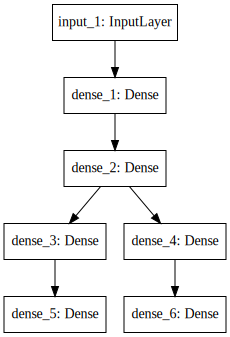

In [58]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))

In [67]:
print(history.history.keys())

['loss', 'dense_23_loss', 'dense_24_loss']


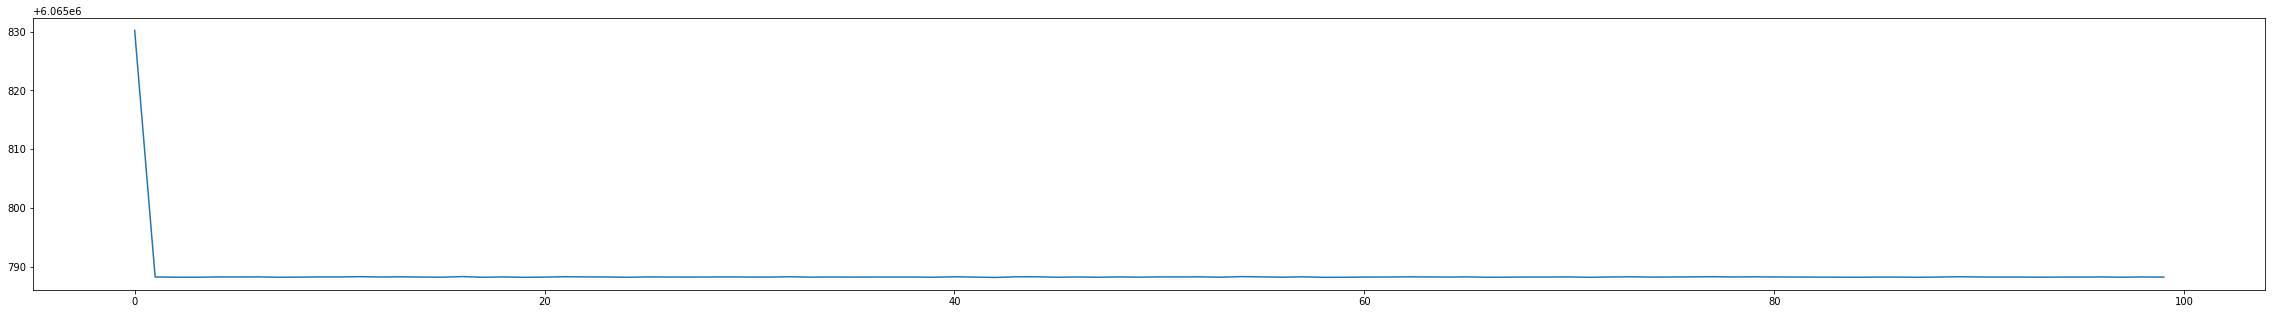

In [68]:
plt.plot(history.history['loss'])